In [1]:
import pandas as pd
import datetime
from finquant.portfolio import build_portfolio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from finquant.efficient_frontier import EfficientFrontier
# plotting style:
plt.style.use("seaborn-darkgrid")
# set line width
plt.rcParams["lines.linewidth"] = 2
# set font size for titles
plt.rcParams["axes.titlesize"] = 14
# set font size for labels on axes
plt.rcParams["axes.labelsize"] = 12
# set size of numbers on x-axis
plt.rcParams["xtick.labelsize"] = 10
# set size of numbers on y-axis
plt.rcParams["ytick.labelsize"] = 10
# set figure size
plt.rcParams["figure.figsize"] = (10, 6)

## Throw on some stocks

In [2]:

d = {
    0: {"Name": "WIKI/GOOG", "Allocation": 20},
    1: {"Name": "WIKI/AMZN", "Allocation": 10},
    2: {"Name": "WIKI/MCD", "Allocation": 15},
    3: {"Name": "WIKI/DIS", "Allocation": 18},
}

### Run everything.

In [4]:
pf_allocation = pd.DataFrame.from_dict(d, orient="index")
names = pf_allocation["Name"].values.tolist()

# dates can be set as datetime or string, as shown below:
start_date = datetime.datetime(2015, 1, 1)
end_date = "2017-12-31"
pf = build_portfolio(
    names=names, pf_allocation=pf_allocation, start_date=start_date, end_date=end_date
)

### Show the tear sheet.

In [5]:
pf.properties()

----------------------------------------------------------------------
Stocks: WIKI/GOOG, WIKI/AMZN, WIKI/MCD, WIKI/DIS
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.238
Portfolio Volatility: 0.150
Portfolio Sharpe Ratio: 1.556

Skewness:
   WIKI/GOOG  WIKI/AMZN  WIKI/MCD  WIKI/DIS
0   0.124184   0.087516   0.58698  0.040569

Kurtosis:
   WIKI/GOOG  WIKI/AMZN  WIKI/MCD  WIKI/DIS
0  -0.751818  -0.856101 -0.602008 -0.892666

Information:
   Allocation       Name
0        20.0  WIKI/GOOG
1        10.0  WIKI/AMZN
2        15.0   WIKI/MCD
3        18.0   WIKI/DIS
----------------------------------------------------------------------


### Optimize the thing.

             Allocation
WIKI/GOOG  1.551552e-01
WIKI/AMZN  3.252607e-19
WIKI/MCD   4.946242e-01
WIKI/DIS   3.502206e-01
----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.187
Annual Volatility: 0.133
Sharpe Ratio: 1.375

Optimal weights:
            WIKI/GOOG     WIKI/AMZN  WIKI/MCD  WIKI/DIS
Allocation   0.155155  3.252607e-19  0.494624  0.350221
----------------------------------------------------------------------


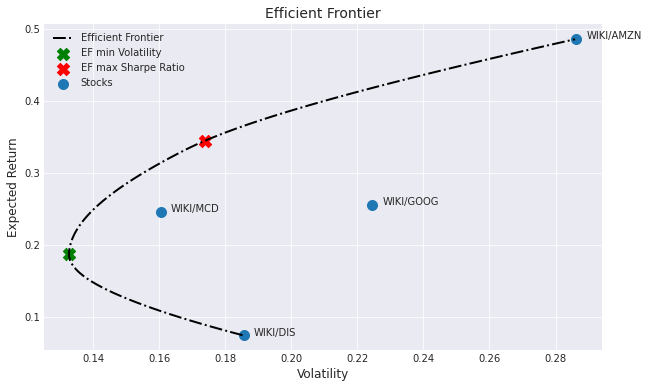

In [6]:
# creating an instance of EfficientFrontier
ef = EfficientFrontier(pf.comp_mean_returns(freq=1), pf.comp_cov())
# optimisation for minimum volatility
print(ef.minimum_volatility())

# printing out relevant quantities of the optimised portfolio
(expected_return, volatility, sharpe) = ef.properties(verbose=True)

# #### Efficient Frontier of `pf`

# computing and plotting efficient frontier of pf
pf.ef_plot_efrontier()
# adding markers to optimal solutions
pf.ef_plot_optimal_portfolios()
# and adding the individual stocks to the plot
pf.plot_stocks()
plt.show()